In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe=pd.read_csv("/content/historical_automobile_sales.csv")
dataframe

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


Text(0, 0.5, 'sales')

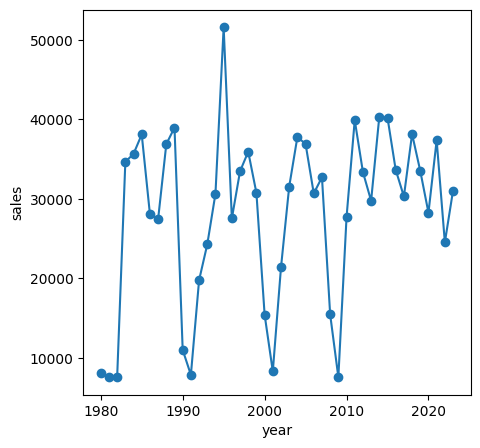

In [15]:
# Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

sales=dataframe.groupby('Year')['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.plot(sales['Year'], sales['Automobile_Sales'], marker='o')
plt.xlabel("year")
plt.ylabel("sales")

Text(0, 0.5, 'sales')

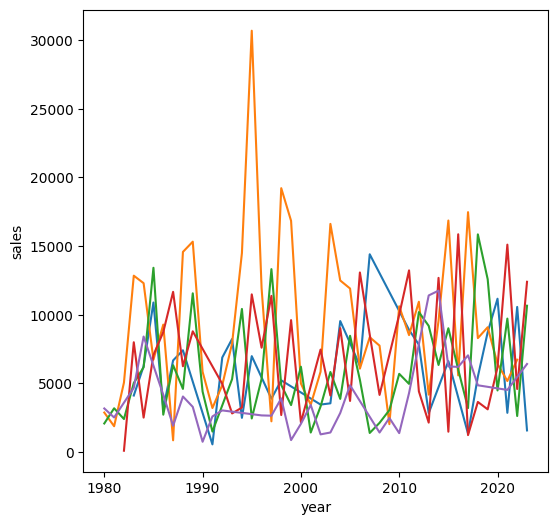

In [16]:
# Q2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?
salesss= dataframe.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(6,6))
for vtype, sub in salesss.groupby('Vehicle_Type'):
    plt.plot(sub['Year'], sub['Automobile_Sales'], label=vtype)
plt.xlabel("year")
plt.ylabel("sales")

<Axes: xlabel='Year', ylabel='Automobile_Sales'>

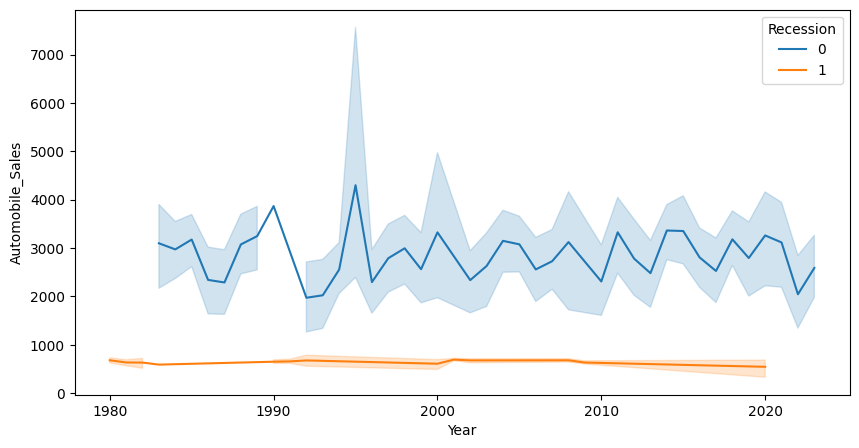

In [17]:
# Q3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.
plt.figure(figsize=(10,5))
sns.lineplot(data=dataframe, x='Year', y='Automobile_Sales', hue='Recession')

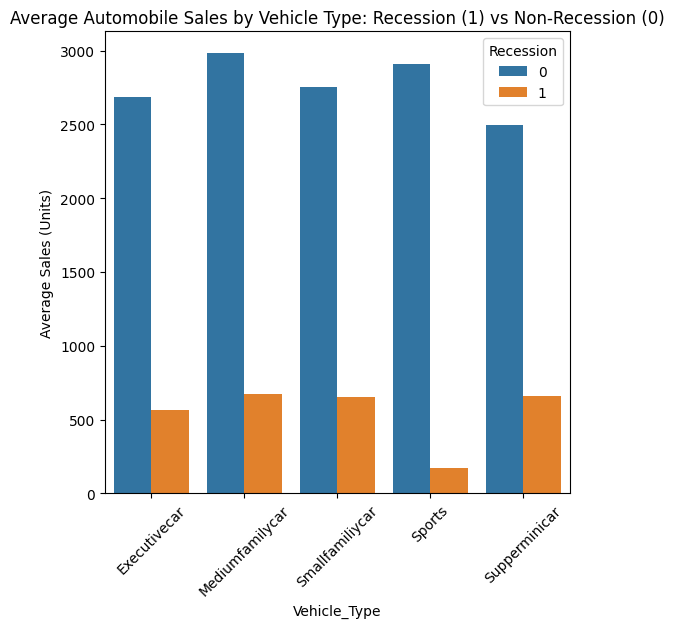

In [18]:
# Q4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period

avg_sales = dataframe.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(data=avg_sales, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')
plt.title('Average Automobile Sales by Vehicle Type: Recession (1) vs Non-Recession (0)')
plt.ylabel('Average Sales (Units)')
plt.xticks(rotation=45)
plt.show()